In this notebook, we will present the sensitivities computed in Section 4 of *Guéant O., Lehalle CA., Fernandez Tapia J. (2012)*. Instead of presenting in tables as it was done in this paper, we will create some plots.

We compare the results at t = 0 for clarity, but the results have been checked for the whole trading period.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from methods import *

Paramters

In [2]:
q_max = 6
T = 300.0
N = 500
dt = T / N

# Baseline model parameters:
A_base = 0.1
k_base = 0.3
gamma_base = 0.05
b_base = 3.0
mu_base = 0.0
sigma_base = 0.3

# Derived baseline parameters:
alpha_base = 0.5 * k_base * gamma_base * sigma_base**2
beta_base  = k_base * mu_base
eta_base   = A_base * (1 + gamma_base/k_base)**(-(1 + k_base/gamma_base))


We define some helper functions

In [3]:
# Function to compute and plot sensitivity for a given parameter.
def plot_sensitivity(param_name, param_values, baseline, compute_derived):

    # For each parameter value, we compute the optimal quotes at t = 0
    results = {}
    q_range = np.arange(1, q_max+1)
    for val in param_values:
        params = baseline.copy()
        params[param_name] = val
        alpha, beta, eta = compute_derived(params)
        quotes = compute_optimal_quote(q_max, N, params['k'], params['b'], alpha, beta, params[r'$\gamma$'], eta, dt)
        # We evaluate at t=0
        results[val] = quotes[1:, 0]

    plt.figure(figsize=(8,5))
    for val in param_values:
        plt.plot(q_range, results[val], marker='o', label=f"{param_name} = {val}")
    plt.xlabel('Inventory level $q$')
    plt.ylabel(r'Optimal quote $\delta^{a*}(0,q)$ (ticks)')
    # plt.title(f'Sensitivity of Optimal Quote w.r.t. {param_name}')
    plt.legend()
    plt.grid(True)
    plt.savefig(f"./Figures/"+param_name.replace("$","").replace('\g',"g").replace('\mu',"mu")+"_sensitivity.png")

# Functions to compute derived parameters for each sensitivity:
def derived_params(params):
    # For general case
    alpha = 0.5 * params['k'] * params[r'$\gamma$'] * params[r'$\sigma$']**2
    beta = params['k'] * params[r'$\mu$']
    eta = params['A'] * (1 + params[r'$\gamma$']/params['k'])**(-(1 + params['k']/params[r'$\gamma$']))
    return alpha, beta, eta

In [4]:
# Baseline parameter dictionary
baseline = {
    'A': A_base,
    'k': k_base,
    r'$\gamma$': gamma_base,
    'b': b_base,
    r'$\mu$': mu_base,
    r'$\sigma$': sigma_base
}

#### Now plot sensitivity for each parameter

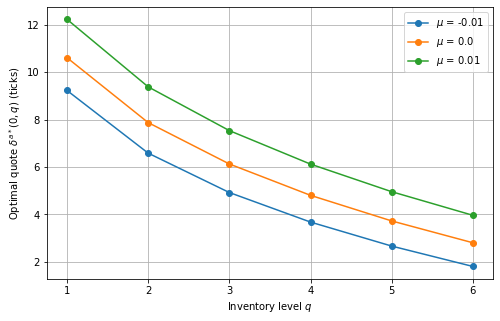

In [5]:
# 1. Sensitivity to μ
mu_values = [-0.01, 0.0, 0.01]
plot_sensitivity(r'$\mu$', mu_values, baseline, derived_params)

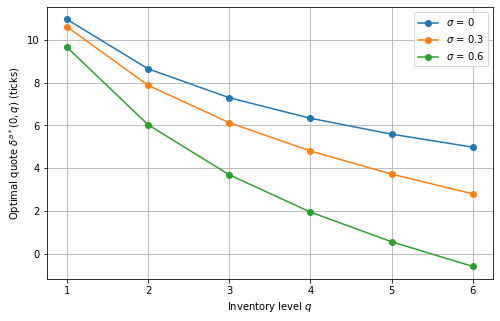

In [6]:
# 2. Sensitivity to σ:
sigma_values = [0, 0.3, 0.6]
plot_sensitivity(r'$\sigma$', sigma_values, baseline, derived_params)

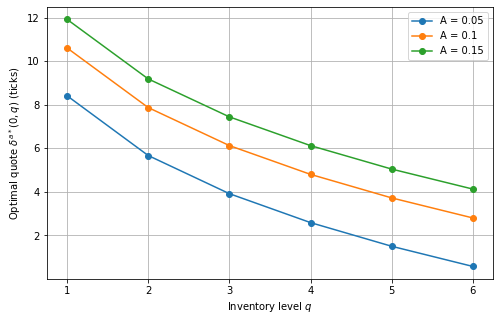

In [7]:
# 3. Sensitivity to A:
A_values = [0.05, 0.1, 0.15]
plot_sensitivity('A', A_values, baseline, derived_params)

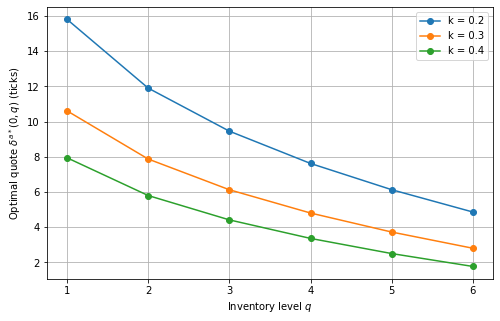

In [8]:
# 4. Sensitivity to k:
k_values = [0.2, 0.3, 0.4]
plot_sensitivity('k', k_values, baseline, derived_params)

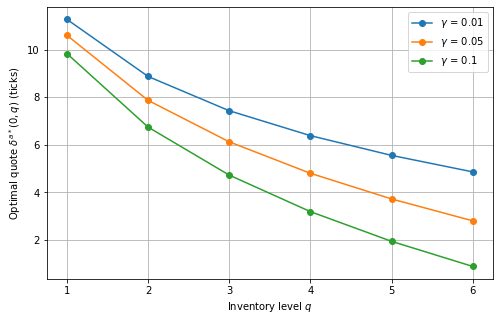

In [9]:
# 5. Sensitivity to γ:
gamma_values = [0.01, 0.05, 0.1]
plot_sensitivity(r'$\gamma$', gamma_values, baseline, derived_params)

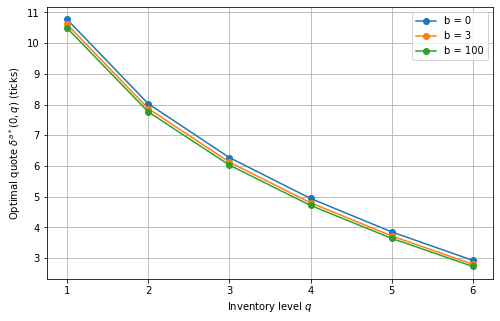

In [10]:
# 6. Sensitivity to b:
b_values = [0, 3, 100]
plot_sensitivity('b', b_values, baseline, derived_params)